Training a qcgan with a gamma function

In [1]:
from scipy.special import kl_div,rel_entr
import numpy as np
from matplotlib import pyplot
import quantum_classical_1Dgamma as qc

import tensorflow as tf
from matplotlib import pyplot
from qibo import gates, hamiltonians, models, set_backend, set_threads

[Qibo 0.1.6|INFO|2022-04-08 10:25:11]: Using numpy backend on /CPU:0
[Qibo 0.1.6|WARNING|2022-04-08 10:25:11]: numpy backend uses `np.einsum` and supports CPU only. Consider installing the qibojit or qibotf backends for increased performance and to enable GPU acceleration.
[Qibo 0.1.6|INFO|2022-04-08 10:25:12]: Using tensorflow backend on /device:CPU:0
[Qibo 0.1.6|WARNING|2022-04-08 10:25:12]: `set_threads` is not supported by the tensorflow backend. Please use tensorflow's thread setters: `tf.config.threading.set_inter_op_parallelism_threads` or `tf.config.threading.set_intra_op_parallelism_threads` to switch the number of threads.


# 30000 epochs 2 layers

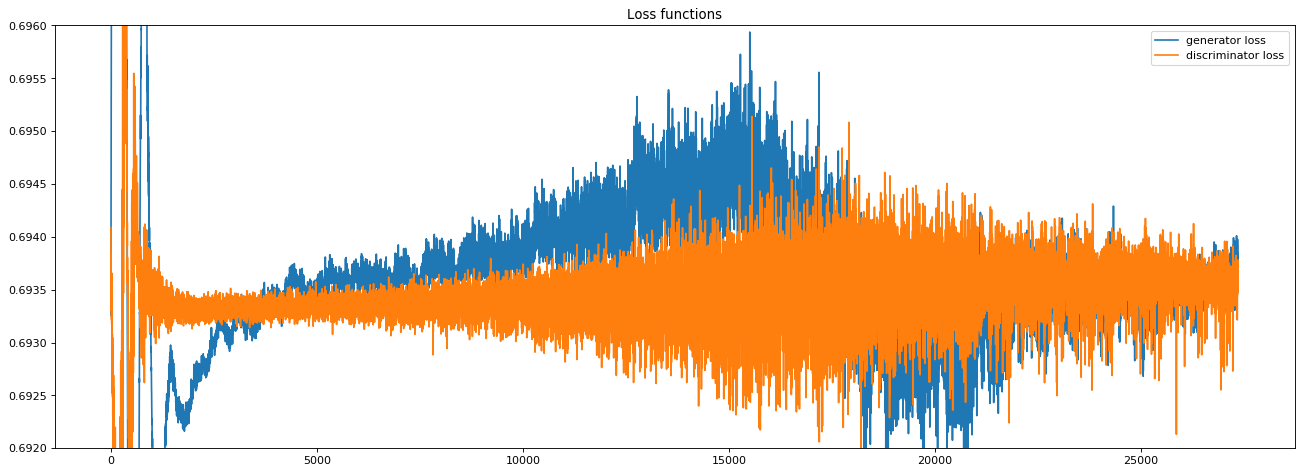

In [6]:
epochs=30000
d_loss = np.loadtxt(f"dloss_1Dgamma_1_3_2_10000_128_0.1_{epochs}", delimiter=' ')
g_loss= np.loadtxt(f"gloss_1Dgamma_1_3_2_10000_128_0.1_{epochs}", delimiter=' ')
#d_loss=d_loss[:5000]
#g_loss=g_loss[:5000]
pyplot.figure(figsize=(20, 7), dpi=80)
pyplot.plot(np.linspace(0, len(g_loss), len(g_loss)), g_loss, label='generator loss')
pyplot.plot(np.linspace(0, len(g_loss), len(g_loss)), d_loss, label='discriminator loss')
pyplot.legend()
pyplot.title("Loss functions")
pyplot.ylim(0.692,0.696)
#pyplot.xlim(0,1000)
pyplot.show()
 

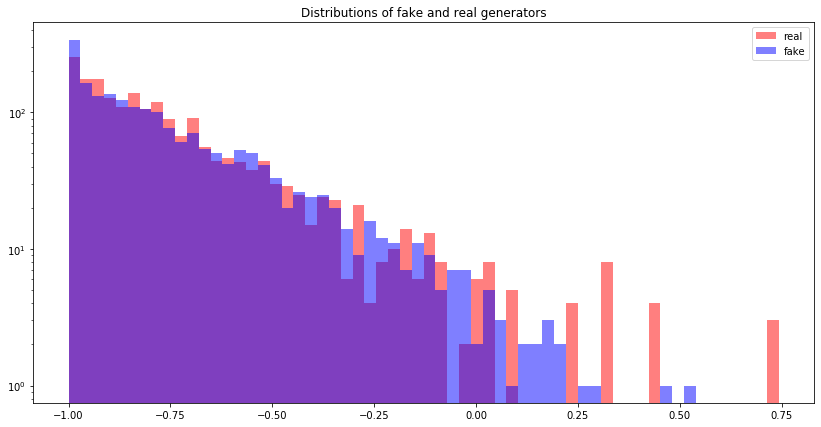

In [6]:
def hamiltonian1():
        m0 = hamiltonians.Z(1).matrix
        ham = hamiltonians.Hamiltonian(1, m0)
        return ham
    
# number of qubits generator
nqubits = 1
# create hamiltonians
hamiltonian1 = hamiltonian1()

latent_dim=3
samples=2000
nqubits=1
layers=2
# create quantum generator
circuit = models.Circuit(nqubits)
for l in range(layers):
    for q in range(nqubits):
        circuit.add(gates.RY(q, 0))
        circuit.add(gates.RZ(q, 0))
for q in range(nqubits):
    circuit.add(gates.RY(q, 0))  

params = np.loadtxt(f"PARAMS_1Dgamma_1_3_2_10000_128_0.1_{epochs}", delimiter=' ', unpack='true')
#print(params,epochs)
params = tf.Variable(params)

x_fake1, y_fake = qc.generate_fake_samples(params, latent_dim, samples, circuit, nqubits, layers, hamiltonian1)

#x_fake,_= qc2.generate_fake_samples(params, latent_dim, samples)
fig, ax = pyplot.subplots(figsize = (14, 7))
s=qc.generate_training_real_samples(samples)
x_real1, y_real = qc.generate_real_samples(samples, s, 1000)

x_real1=x_real1
x_fake1=x_fake1
ax.set_yscale('log')
nbins=60
bins_real=pyplot.hist(x_real1, color='red', bins=nbins,label='real', alpha=0.5)
bins_fake=pyplot.hist(x_fake1.numpy(), bins=bins_real[1],color='blue', label='fake', alpha=0.5)

pyplot.legend()
pyplot.title("Distributions of fake and real generators")
pyplot.show()

scala logaritmica

Calculation of the kl divergences: This formula has a problem: if there are bins with no elements the kl divergence diverges, this problem can be solved adding a small quantity at each bin.

In [4]:
def kl_divergence(bins_real, bins_fake,epsilon):
    
    epsilon=0.1
    prob_real=[]
    prob_fake=[]
    for i in range (len(bins_real)):
        prob_real.append(bins_real[i]+epsilon)
        prob_fake.append(epsilon+bins_fake[i])

    #print(prob_fake,prob_real)  

    prob_real=prob_real/sum(prob_real) # probability for each bin (Normalization)
    prob_fake=prob_fake/sum(prob_fake)

   
    return sum(prob_real[i] * np.log(prob_real[i]/prob_fake[i]) for i in range(len(prob_real)))# Convergence problem if a[i] or b[i] equals zero. 
                                                            #I add a little quantity to each bin to avoid problems


#print(prob_fake,prob_real)
print("KL DIVERGENCE:",kl_divergence(bins_real[0],bins_fake[0],epsilon=0.1))

KL DIVERGENCE: 0.09474547954592011


# 2000 epochs 2 layers

What happens if I train the gamma distribution for only 1000 epochs ?

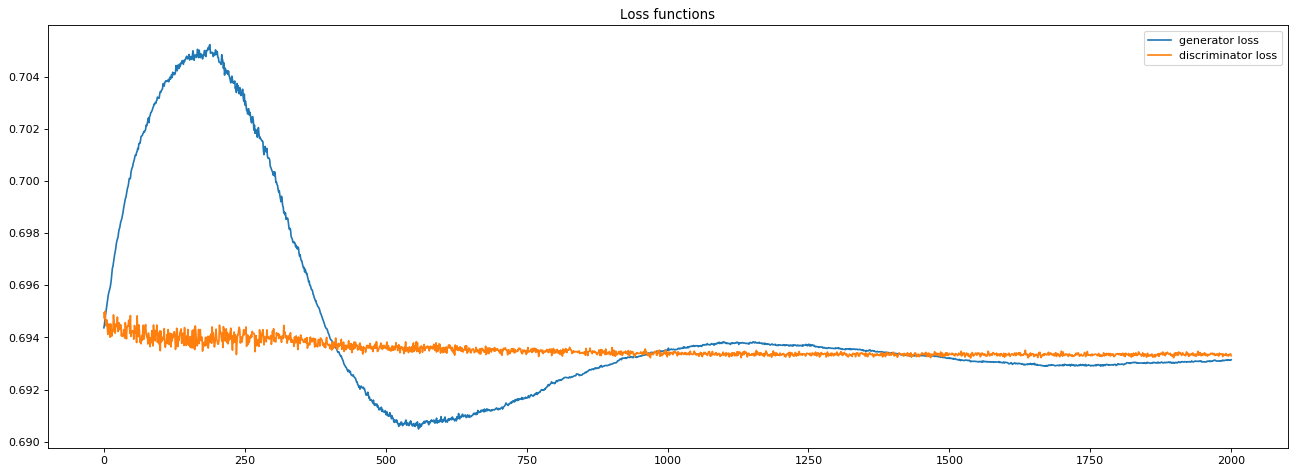

In [2]:
epochs=2000
d_loss = np.loadtxt(f"dloss_1Dgamma_1_3_2_10000_128_0.1_{epochs}", delimiter=' ')
g_loss= np.loadtxt(f"gloss_1Dgamma_1_3_2_10000_128_0.1_{epochs}", delimiter=' ')
pyplot.figure(figsize=(20, 7), dpi=80)
pyplot.plot(np.linspace(0, len(g_loss), len(g_loss)), g_loss, label='generator loss')
pyplot.plot(np.linspace(0, len(g_loss), len(g_loss)), d_loss, label='discriminator loss')
pyplot.legend()
pyplot.title("Loss functions")
#pyplot.ylim(0.692,0.696)
pyplot.show()
 

[ 0.14992184 -0.1002412   0.06686053 -0.10996885  0.16537455 -0.13067356
 -0.01379033  0.12797518  0.12978773 -0.11388237]


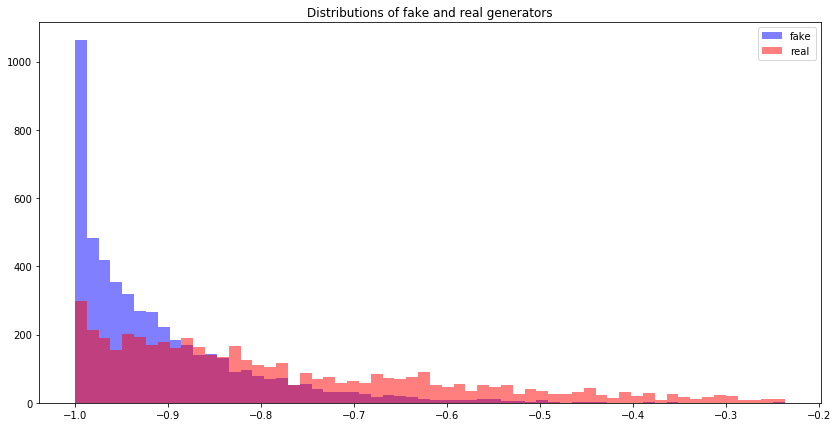

In [3]:
def hamiltonian1():
        m0 = hamiltonians.Z(1).matrix
        ham = hamiltonians.Hamiltonian(1, m0)
        return ham
    
# number of qubits generator
nqubits = 1
# create hamiltonians
hamiltonian1 = hamiltonian1()

latent_dim=3
samples=5000
nqubits=1
layers=2
# create quantum generator
circuit = models.Circuit(nqubits)
for l in range(layers):
    for q in range(nqubits):
        circuit.add(gates.RY(q, 0))
        circuit.add(gates.RZ(q, 0))
for q in range(nqubits):
    circuit.add(gates.RY(q, 0))  

params = np.loadtxt(f"PARAMS_1Dgamma_1_3_2_10000_128_0.1_{epochs}", delimiter=' ', unpack='true')
print(params)
params = tf.Variable(params)

x_fake,_ = qc.generate_fake_samples(params, latent_dim, samples, circuit, nqubits, layers, hamiltonian1)
s=qc.generate_training_real_samples(samples)
x_real, y_real = qc.generate_real_samples(samples, s, 3000)

fig, ax = pyplot.subplots(figsize = (14, 7))

x_real=x_real
x_fake=x_fake
#ax.set_yscale('log')
nbins=60

bins_fake=pyplot.hist(x_fake.numpy(), bins=nbins,color='blue', label='fake', alpha=0.5)
bins_real=pyplot.hist(x_real, color='red', bins=bins_fake[1],label='real', alpha=0.5)
pyplot.legend()
pyplot.title("Distributions of fake and real generators")
pyplot.show()

In [4]:
def kl_divergence(bins_real, bins_fake,epsilon):
    
    epsilon=0.1
    prob_real=[]
    prob_fake=[]
    for i in range (len(bins_real)):
        prob_real.append(bins_real[i]+epsilon)
        prob_fake.append(epsilon+bins_fake[i])

    #print(prob_fake,prob_real)  

    prob_real=prob_real/sum(prob_real) # probability for each bin (Normalization)
    prob_fake=prob_fake/sum(prob_fake)

   
    return sum(prob_real[i] * np.log(prob_real[i]/prob_fake[i]) for i in range(len(prob_real)))# Convergence problem if a[i] or b[i] equals zero. 
                                                            #I add a little quantity to each bin to avoid problems

print("KL DIVERGENCE:",kl_divergence(bins_real[0],bins_fake[0],epsilon=0.1))

KL DIVERGENCE: 0.6039275510497834


In [6]:
from scipy import stats
import numpy as np
print ("mean of real distribution: ",np.mean(x_real))
for i in range (2,5):
    print(f"{i} moment of real distribution; ", stats.moment(x_real,moment=i)[0])
print()
print ("mean of fake distribution: ",np.mean(x_fake))
for i in range (2,5):
    print(f"{i} moment of fake distribution; ", stats.moment(x_fake,moment=i)[0])


mean of real distribution:  -0.7383895621016454
2 moment of real distribution;  0.07143090611659954
3 moment of real distribution;  0.03819859409420569
4 moment of real distribution;  0.0419231978796658

mean of fake distribution:  -0.9114453611140427
2 moment of fake distribution;  0.009078836831801738
3 moment of fake distribution;  0.0015329628718866414
4 moment of fake distribution;  0.0005681822573573828


In [14]:
np.savetxt('fake_data.dat',x_fake)